# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tasya Putri Aliya
- **Email:** tasyaputrialiya@gmail.com
- **ID Dicoding:** tasyaputrialiya

## Menentukan Pertanyaan Bisnis

- Apakah holiday mempengaruhi jumlah peminjaman sepeda?
- Hari apakah yang memiliki jumlah peminjaman terbesar dan terkecil?
- Pada pukul berapa puncak peminjaman sepeda terjadi?
- Bagaimana pertumbuhan peminjaman sepeda pada tahun 2011 dengan 2012?

## Import Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

## Data Wrangling

### Gathering Data

Input data day.csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


#### Load tabel day

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Tabel hour

Input data hour.csv

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data (Penilaian Data)

#### Assessing Data Tabel day

Melihat karakteristik dari data tabel menggunakan info()

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil di atas didapatkan bahwa seluruh kolom memiliki jumlah value yang sama yaitu 731, dengan hal ini maka kemungkinan tidak ada kolom yang memiliki missing value. Namun terdapat hal aneh pada tabel tersebut yaitu pada tipe data dteday yang masih berupa object. Tipe data tersebut seharusnya berbentuk datetime

Melakukan pengecekan data duplikat

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Data pada tabel tersebut juga tidak memiliki data duplikat

Melihat deskripsi data

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tidak ada yang aneh dalam data, data sudah dilakukan normalisasi serta dalam keadaan yang normal. Karena tabel data sudah dalam keadaan yang baik maka pada tahap cleaning hanya akan dilakukan perubahan tipe data dari dtetime.

Pemeriksaan outlier

#### Assessing Data Tabel Hour

Melihat karakteristik tabel menggunakan info()

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasl yang didapatkan, seluruh kolom memiliki jumlah non-Null yang sama sehingga dapat disimpulkan bahwa tidak terdapat missing value, namun sama seperti tabel sebelumnya juga pada kolom atau variabel dteday tipe data masih berupa object yang seharusnya dapat berupa datetime. Pada cleaning data akan dilakukan perubahan terhadap tipe data tersebut.

Selanjutnya, melakukan pengecekan data duplikat

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukkan bahwa tidak terdapat duplikasi juga pada tabel

Melihat deskripsi dari data

In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan deskripsi tersebut, tidak ditemukan value yang menyimpang terhadap data dan beberapa value numerik sudah dilakukan normalisasi sehingga tidak terjadi bias. Oleh karena itu, cleaning data hanya akan melakukan perubahan tipe data dtetime.

### Cleaning Data

#### Cleaning Data Tabel day

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada cleaning ini hanya akan dilakukan perubahan data dari yang semula object menjadi datetime pada variabel dtetime

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah dilakukan perubahan tipe data dapat dilihat bahwa tipe data dtetime sudah berubah menjadi datetime. Maka proses cleaning ini telah selesai

#### Cleaning Data Tabel hour

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada cleaning ini hanya akan dilakukan perubahan data dari yang semula object menjadi datetime pada variabel dtetime

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah dilakukan perubahan tipe data dapat dilihat bahwa tipe data dtetime sudah berubah menjadi datetime. Maka proses cleaning ini telah selesai

## Exploratory Data Analysis (EDA)

### Explore Data Tabel day

In [16]:
day_df.describe(include="all")

<ipython-input-16-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan hasil deskripsi di atas, didapatkan bahwa value dari holiday menggunakan encoding berupa 1 dan 0 dimana 1 menandakan sedang holiday dan 0 menandakan hari biasa (bukan holiday). Setelah ini dilakukan pivot table untuk melihat perbandingan jumlah peminjaman holiday dengan bukan holiday, namun sebelumnya dilakukan perubahan value menjadi nilai not holiday dan holiday untuk mengurangi kebingungan pada saat visualisasi. Namun sebelum melakukan perubahan value akan dilakukan pembuatan dataframe baru dengan mengcopy dataframe day_df untuk digunakan dalam menghitung korelasi dengan cnt.

In [17]:
day_df_corr = day_df.copy()

Perubahan value holiday dimana 0 menjadi not holiday dan 1 menjadi holiday

In [18]:
day_df['holiday'] = day_df['holiday'].replace({0: 'not holiday', 1: 'holiday'})

Melakukan pivot tabel dengan parameter holiday untuk menghitung jumlah cnt, pivot tabel ini di simpan di dalam variabel jumlah_penyewaan karena akan digunakan dalam perhitungan rata-rata

In [19]:
jumlah_penyewaan = day_df.groupby(by="holiday").cnt.sum()
jumlah_penyewaan

holiday
holiday          78435
not holiday    3214244
Name: cnt, dtype: int64

Untuk melakukan perhitungan secara adil, maka akan dilakukan perbandingan menggunakan rata-rata penyewaan dalam sehari mengingat jumlah hari holiday dengan tidak berbeda. Oleh karena itu dilakukan perhitungan jumlah hari menggunakan pivot tabel dan disimpan di dalam variabel jumlah_hari

In [20]:
jumlah_hari = day_df.groupby(by="holiday").instant.count()
jumlah_hari

holiday
holiday         21
not holiday    710
Name: instant, dtype: int64

Perhitungan rata-rata dengan menggunakan variabel jumlah_penyewaan dibagi dengan jumlah_hari. Hasil perhitungan ini disimpan di dalam variabel perbandingan_holiday

In [21]:
perbandingan_holiday = jumlah_penyewaan / jumlah_hari
perbandingan_holiday

holiday
holiday        3735.000000
not holiday    4527.104225
dtype: float64

Kemudian melakukan eksplorasi data untuk membuat perbandingan hari yang memiliki jumlah peminjaman terbanyak dan tersedikit untuk dapat menjawab pertanyaan kedua

In [22]:
day_df.groupby(by="weekday").agg({
    "cnt": "sum",
    "instant": "count",
}).sort_values(by="weekday", ascending=True)

,cnt,instant
weekday,,
0,444027,105
1,455503,105
2,469109,104
3,473048,104
4,485395,104
5,487790,104
6,477807,105


Karena jumlah hari dalam perhitungan hampir sama, maka nilai yang digunakan akan langsung menggunakan count.sum()

Kemudian dilakukan eksplor data untuk melihat pertumbuhan peminjaman sepeda pada tahun 2011 dan 2012 dimana terdapat pada variabel yr yang menggunakan encoding 0 dan 1 dengan 0 2011 dan 1 2012. Eksplorasi ini digunakan untuk dapat menjawab pertanyaan keempat

In [23]:
day_df.groupby(by="yr").cnt.sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

Melakukan pengecekan korelasi antara variabel independen dengan variabel dependen pada tabel day yaitu tabel cnt, perhitungan korelasi ini dilakukan sebagai pendukung untuk menjawab pertanyaan pertama

In [24]:
day_df.corr()['cnt'].sort_values(ascending=False)

<ipython-input-24-a42b449c32b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()['cnt'].sort_values(ascending=False)


cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

### Explore Data Tabel hour

Data pada tabel ini digunakan untuk menjawab pertanyaan ketiga yang sebenarnya perlu untuk digabungkan dengan tabel day untuk memastikan kesesuaian jawaban. Namun sebelum eksplorasi menggunakan penggabungan kedua tabel tersebut maka akan dilakukan eksplorasi menggunakan tabel hour saja terlebih dahulu.

In [25]:
hour_df.describe(include="all")

<ipython-input-25-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [26]:
hourly_sum = hour_df.groupby(by="hr").cnt.sum()
hourly_sum_sorted = hourly_sum.sort_values(ascending=False)
hourly_sum_sorted

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Berdasarkan hasil perhitungan di atas sudah didapatkan hasil dari pukul dimana peminjaman memuncak. Namun, data tersebut masih perlu dipastikan dengan menggabungkan kedua data menjadi all_df

### Explore Data All

Langkah pertama untuk dapat melakukan eksplorasi data all_df ini adalah dengan menggabungkan kedua tabel yaitu day_df dengan hour_df. Penggabungan ini dilakukan dengan melakukan merge dengan menyamakan variabel dteday.

In [27]:
all_df = pd.merge(day_df, hour_df, on='dteday', how='inner')
all_df

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,not holiday,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,not holiday,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,not holiday,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,not holiday,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [28]:
hourly_all_sum = all_df.groupby(by="hr").cnt_x.sum()
hourly_all_sum_sorted = hourly_all_sum.sort_values(ascending=False)
hourly_sum_sorted

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Setelah dilakukan penggabungan data, didapatkan bahwa hasil dari data hour_df dengan all_df adalah sama.

In [29]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah holiday mempengaruhi jumlah peminjaman sepeda?

Untuk menjawab pertanyaan ini akan digunakan hasil pivot table terhadap variabel holiday yang sudah dihitung rata-rata per harinya

Visualisasi pertama yang digunakan untuk menggambarkan jawaban adalah bar chart. Pada bar chart ini dilakukan perbandingan antara rata-rata sepeda yang tersewa setiap harinya berdasarkan status holiday dan tidak holiday. Didapatkan bahwa tidak holiday memiliki hasil yang lebih besar.

<ipython-input-30-47934b42a15a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


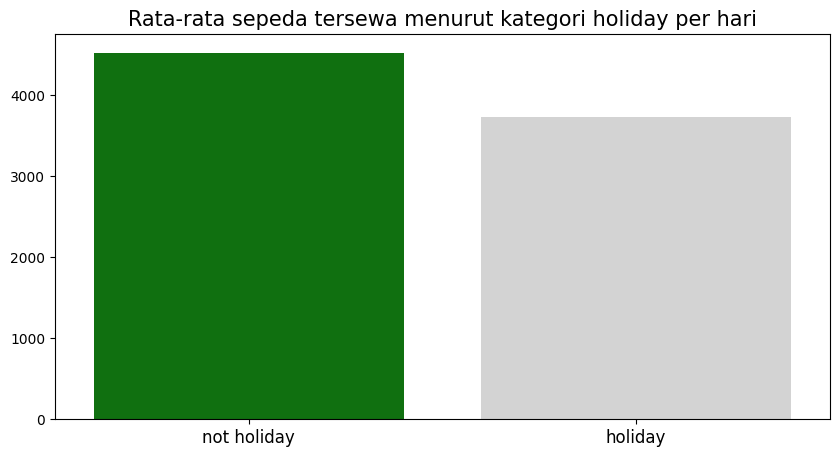

In [30]:
perbandingan_holiday_sorted = perbandingan_holiday.sort_values(ascending=False)
plt.figure(figsize=(10, 5))

sns.barplot(
    y=perbandingan_holiday.values,
    x=perbandingan_holiday.index,
    order=perbandingan_holiday_sorted.index,
    palette={"not holiday": "green", "holiday": "lightgray"}
)
plt.title("Rata-rata sepeda tersewa menurut kategori holiday per hari", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Kemudian dilakukan juga visualisasi untuk melihat perbandingan dalam persentase menggunakan pie chart, dan didapatkan bahwa not holiday memiliki hasil yang lebih tinggi 9% dari holiday. Namun, apakah ini langsung menjawab bahwa holiday tidak berpengaruh? Untuk dapat memastikannya akan dilakukan perhitungan korelasi terlebih dahulu

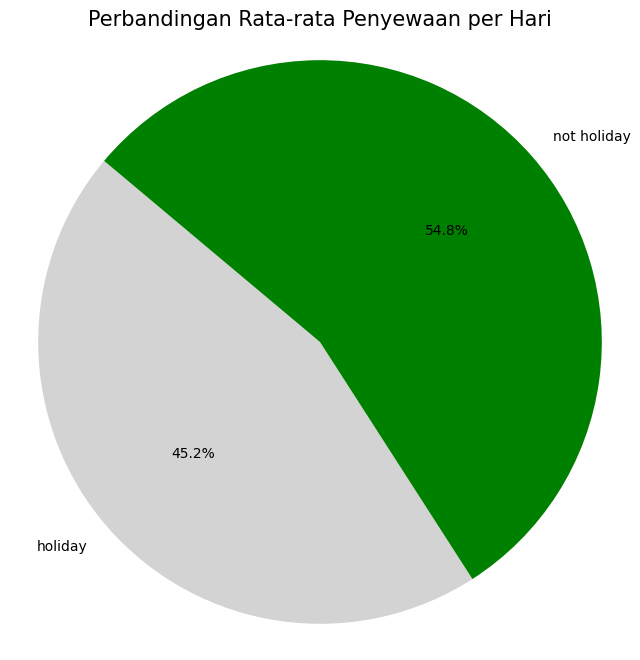

In [31]:
labels = perbandingan_holiday.index
sizes = perbandingan_holiday.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgrey', 'green'], startangle=140)

plt.title('Perbandingan Rata-rata Penyewaan per Hari', fontsize=15)
plt.axis('equal')
plt.show()

Untuk dapat menemukan seberapa berpengaruh suatu variabel juga dapat menggunakan korelasi dimana semakin mendekati 1 maka akan semakin berkorelasi atau berhubungan dan jika positif maka berhubungan lurus. Korelasi dapat digambarkan dengan scatter plot, berikut scatter plot yang didapatkan untuk menjawab pertanyaan ini. Visualisasi selanjutnya menggunakan scatter plot. Dengan menggunakan scatter plot ini akan divisualisasikan korelasi antara variabel independen berupa holiday dengan variabel dependen berupa cnt

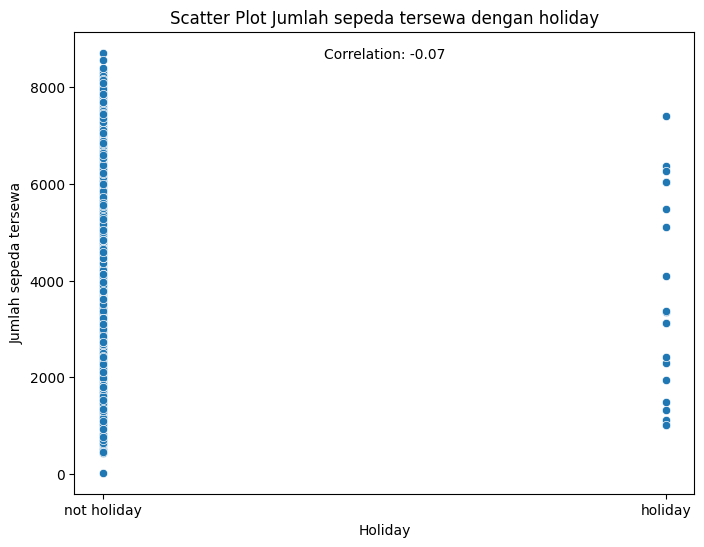

In [32]:
corr = day_df_corr['cnt'].corr(day_df_corr['holiday'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='holiday', y='cnt', data=day_df)
plt.text(0.5, 0.95, f'Correlation: {corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Holiday')
plt.ylabel('Jumlah sepeda tersewa')
plt.title('Scatter Plot Jumlah sepeda tersewa dengan holiday')

plt.show()

Jika dilihat dari hasil tersebut didapatkan bahwa korelasi sangat kecil dan negatif (mendekati nol) dan scatter plot menunjukkan hasil yang buruk karena data ini tidak dapat digambarkan dengan scatter plot sebab merupakan data merupakan data kategorikal. Jika dilihat dari hasil korelasi, maka holiday sepertinya tidak mampengaruhi hasil dari variabel dependen yaitu cnt

### Pertanyaan 2: Hari apakah yang memiliki jumlah peminjaman terbanyak dan sedikit?

Visualisasi yang digunakan untuk menjawab pertanyaan ini adalah menggunakan column bar chart yang akan menggambarkan jumlah total persewaan dalam 7 hari. Bar chart ini sudah diurutkan berdasarkan jumlah terbesarnya hingga terkecil dengan highlight berupa hijau untuk terbesar dan merah untuk terkecil.

<ipython-input-33-b23a3c8095b5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


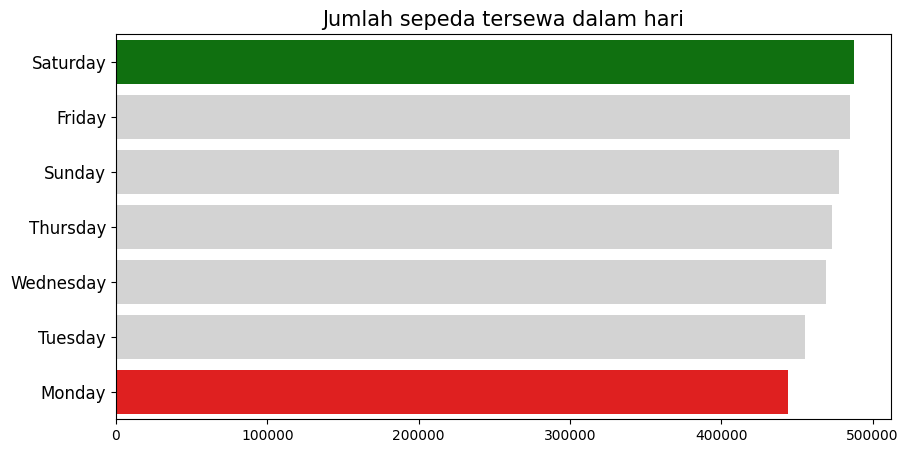

In [33]:
day_df['weekday'] = day_df['weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
jumlah_weekday = day_df.groupby(by="weekday")['cnt'].sum()
jumlah_weekday_sorted = jumlah_weekday.sort_values(ascending=False)
weekday_min = jumlah_weekday_sorted.min()
weekday_max = jumlah_weekday_sorted.max()
plt.figure(figsize=(10, 5))
colors_ = ['red' if val == weekday_min else 'green' if val == weekday_max else '#D3D3D3' for val in jumlah_weekday_sorted.values]
sns.barplot(
    x=jumlah_weekday.values,
    y=jumlah_weekday.index,
    order = jumlah_weekday_sorted.index,
    palette=colors_
)
plt.title("Jumlah sepeda tersewa dalam hari", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Kemeudian dilakukan pula visualisasi menggunakan line chart untuk melihat perbedaan antara jumlah penyewaan setiap harinya. Skala line chart tidak dimulai dari 0 agar perbedaan antara satu titik dengan titik lainnya dapat terlihat karena jika dimulai dari titik 0 maka perubahan tidak terlihat. Dari grafik titik tertinggi diberi warna hijau dan titik terendah diberi warna merah.

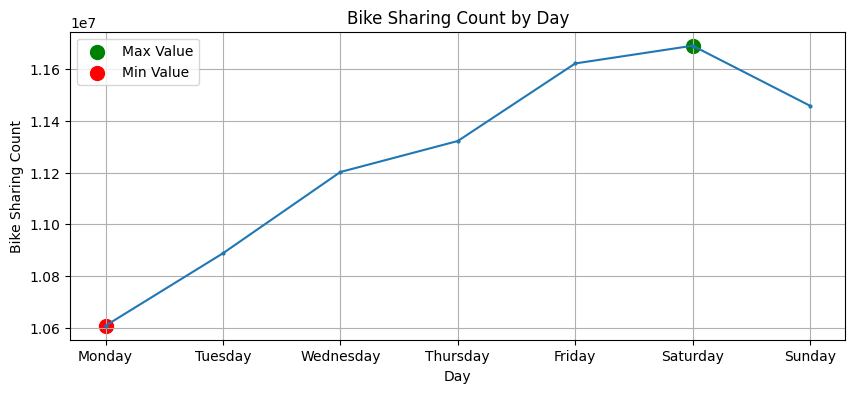

In [34]:
weekday_max = np.argmax(jumlah_weekday.values)
weekday_min = np.argmin(jumlah_weekday.values)


jumlah_weekday = all_df.groupby('weekday_x').cnt_x.sum()
jumlah_weekday = jumlah_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
weekday_max = jumlah_weekday.idxmax()
weekday_min = jumlah_weekday.idxmin()

plt.figure(figsize=(10, 4))
plt.plot(jumlah_weekday.index, jumlah_weekday.values, marker='o', markersize=2, linestyle='-')
plt.scatter(weekday_max, jumlah_weekday[weekday_max], color='green', s=100, label='Max Value')
plt.scatter(weekday_min, jumlah_weekday[weekday_min], color='red', s=100, label='Min Value')
plt.xlabel('Day')
plt.ylabel('Bike Sharing Count')
plt.title('Bike Sharing Count by Day')
plt.xticks(jumlah_weekday.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.legend()
plt.show()

Berdasarkan visualisasi tersebut didapatkan hari dengan persewaan sepeda terbanyak (saturday) dan tersedikit (monday)

### Pertanyaan 3: Pada pukul berapa puncak peminjaman sepeda terjadi?

Untuk mendapatkan jawaban dari pertanyaan ini akan digunakan visualisasi menggunakan metode line chart dan juga box plot. Pada line chart digambarkan jumlah sepeda yang tersewa berdasarkan jamnya. Dari line chart ini dapat terlihat titik tertingginya yaitu titik dengan warna hijau, yaitu 17. Dengan alasan kemudahan untuk melihat perbedaan antara jamnya maka line chart ini juga tidak dimulai dari 0 saat viasualisasinya karena jika  dimulai dari 0 maka akan sangat sulit untuk melihat perbedaannya

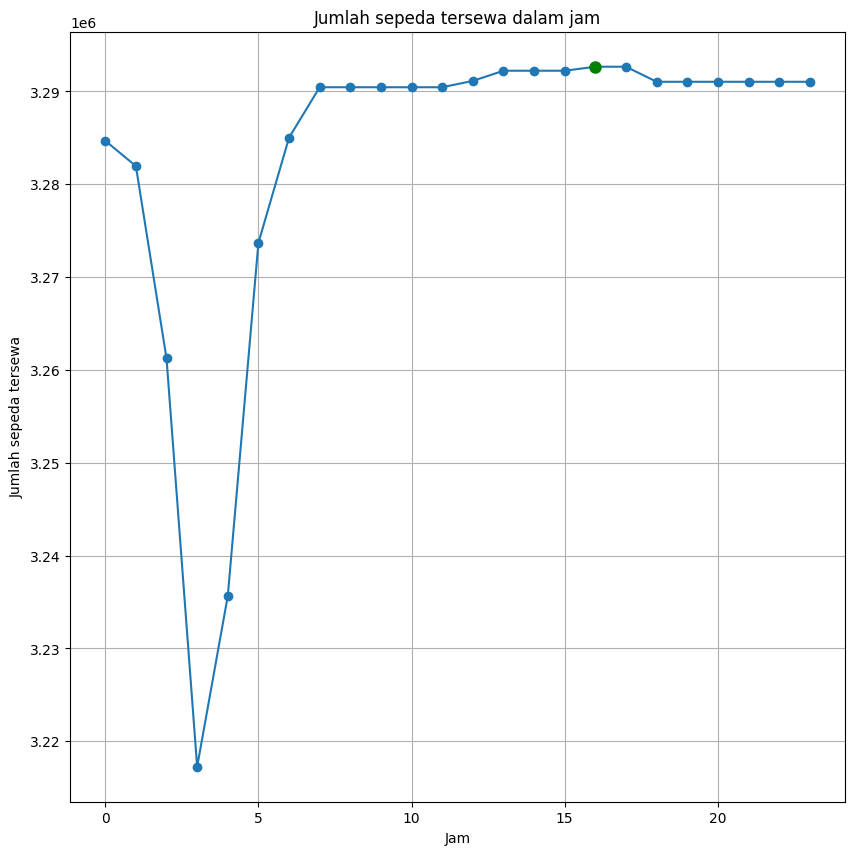

In [35]:
hourly_all_sum = all_df.groupby(by="hr").cnt_x.sum()
max_value_hour = hourly_all_sum.idxmax()
plt.figure(figsize=(10, 10))
plt.plot(hourly_all_sum.index, hourly_all_sum.values, marker='o', linestyle='-')
plt.plot(hourly_all_sum.index[max_value_hour], hourly_all_sum.values[max_value_hour], marker='o', markersize=8, linestyle='None', color='green')
plt.xlabel('Jam')
plt.ylabel('Jumlah sepeda tersewa')
plt.title('Jumlah sepeda tersewa dalam jam')

plt.grid(True)
plt.show()

Kemudian dilakukan visualisasi menggunakan box plot untuk melihat distribusi pelanggan dalam melakukan penyewaan sepeda berdasarkan jamnya. Dan dapat dilihat bahwa dari segala sisi, pukul 17 memiliki jumlah yang lebih tinggi dibandingkan jam-jam lainnya

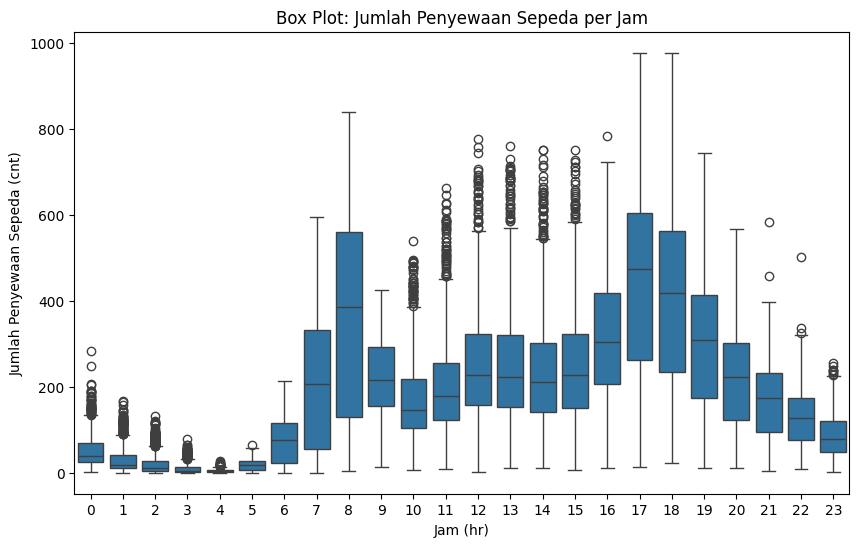

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Box Plot: Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

### Pertanyaan 4: Bagaimana pertumbuhan peminjaman sepeda pada tahun 2011 dengan 2012?

Untuk menjawab pertanyaan ini akan dilakukan visualisasi pertama berupa perbandingan antara jumlah total penyewaan yang terjadi pada 2011 dan 2012 (Dalam satu tahun) menggunakan bar chart. Bar chart digunakan untuk melihat perbandingan jumlah sewa antara 2012 dan 2011 dan dapat dilihat bahwa pertumbuhannya hampir dua kali lipat

<ipython-input-37-fb40a7a035b9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


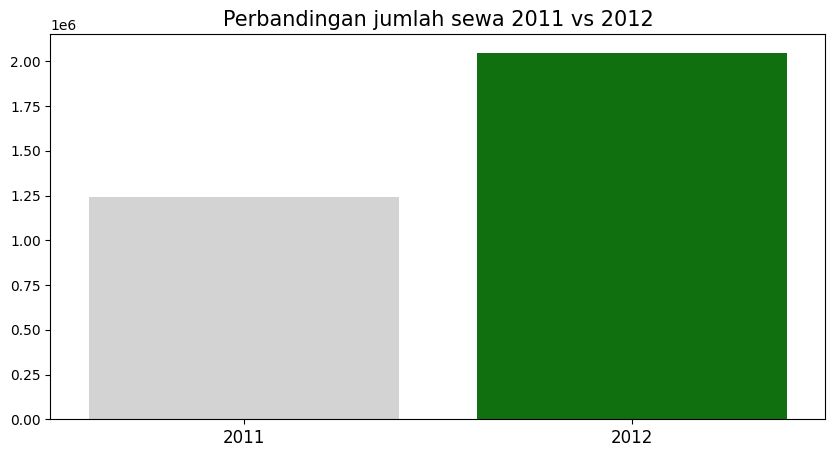

In [37]:
day_df['yr'] = day_df['yr'].replace({0: '2011', 1: '2012'})
total_sewa = day_df.groupby(by="yr").cnt.sum()
max_value_index = total_sewa.idxmax()
colors = ['green' if idx == max_value_index else 'lightgrey' for idx in total_sewa.index]

plt.figure(figsize=(10, 5))

sns.barplot(
    y=total_sewa.values,
    x=total_sewa.index,
    palette=colors
)
plt.title("Perbandingan jumlah sewa 2011 vs 2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Kemudian dapat dilihat perkembangan sewa sepeda pada setiap bulannya menggunakan line chart untuk melihat pertumbuhan organisasi setiap bulannya dengan menggunakan resample per bulan

<ipython-input-38-87f473d3e8e8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = day_df.resample('M').sum()


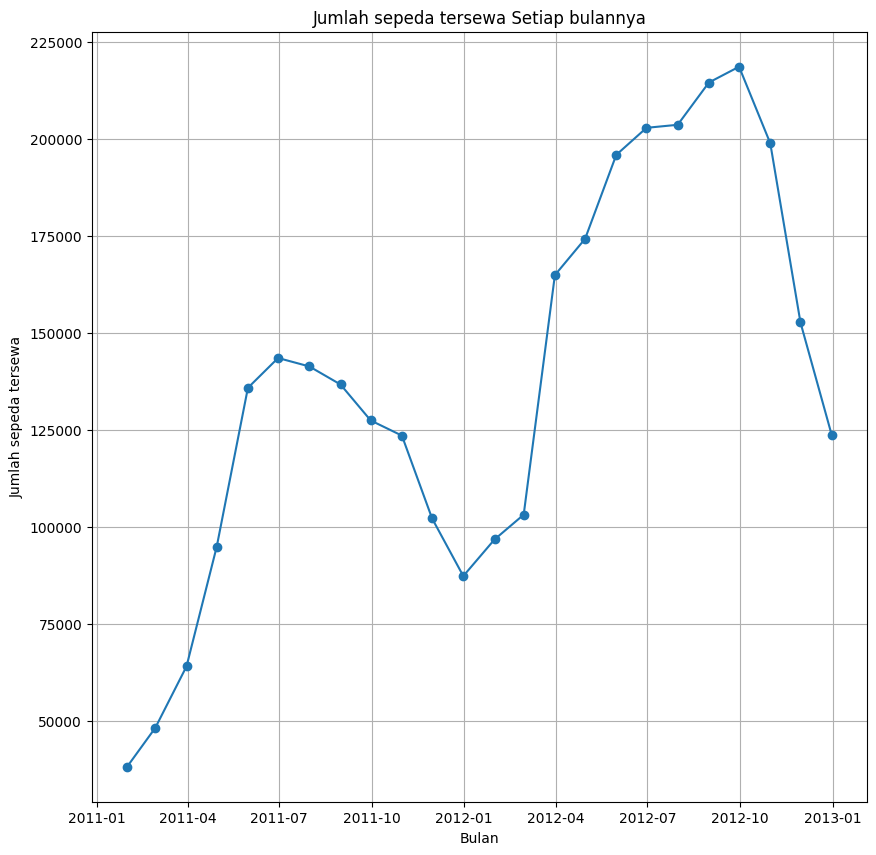

In [38]:
day_df.set_index('dteday', inplace=True)
monthly_data = day_df.resample('M').sum()
plt.figure(figsize=(10, 10))
plt.plot(monthly_data.index, monthly_data['cnt'], marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Jumlah sepeda tersewa')
plt.title('Jumlah sepeda tersewa Setiap bulannya')
plt.grid(True)
plt.show()

Dari grafik tersebut dapat terlihat jumlah penyewaan sepeda setiap bulannya selama 2011-2012. Terdapat peningkatan penyewaan sepeda pada tahun 2012 jika dibandingkan pada bulan yang sama tahun sebelumnya

### Teknik Analisis Lanjutan

Teknik analisis lanjutan yang akan digunakan pada dataset ini dan untuk mendukung jawaban pertanyaan keempat akan dilakukan prediksi dari penyewaan sepeda setahun ke depan menggunakan data yang ada. Metode yang digunakan untuk teknik analisis lanjutan ini adalah time series prediction berupa menggunakan algoritma statistika berupa ARIMA. Data train yang akan digunakan adalah 70-30 mengingat data berjumlah kecil sehingga untuk mendapatkan data testing yang cukup besar akan dibagi menjadi 70% data training dan 30% merupakan data testing

Tahap pertama yang dilakukan adalah membuat dataframe monthly_data dengan resample perbulan karena prediksi akan dilakukan per bulan. Lalu melakukan data splitting  sebesar 70%-30% dan melakukan pembuatan model menggunakan parameter 5, 1, 0 yang digunakan setelah melakukan beberapa kali percobaan dan hasil tersebutlah yang terbaik. Setelah model dibuat maka akan dilakukan fitting atau pelatihan data menggunakan data training untuk melatih model agar model terbiasa dengan tipe data dan memberikan hasil akurat pada prediksi menggunakan data lainnya. Setelah itu dilakukan prediksi baik menggunakan data testing maupun data training yang disimpan di dalam variabel dataframe pred_testing dan pred

In [39]:
def create_monthly_data(df):
    df.set_index('dteday', inplace=True)
    monthly_data = df.resample('M').sum()
    return monthly_data

monthly_data.reset_index(inplace=True)
train_len = int(np.ceil(0.7 * len(monthly_data)))
train_data = monthly_data.iloc[:train_len]
test_data = monthly_data.iloc[train_len:]
# Inisialisasi tanggal awal dan akhir prediksi
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
model = ARIMA(train_data['cnt'], order=(5,1,0))
model_fit = model.fit()
pred_testing = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])
pred = model_fit.predict(start=pred_start_date,end=pred_end_date)

In [40]:
test_data.loc[:, 'Prediceted ARIMA'] = pred

<ipython-input-40-b6098089a6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'Prediceted ARIMA'] = pred


In [41]:
test_data

,dteday,instant,season,mnth,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Prediceted ARIMA
17,2012-06-30,15975,70,180,21,35,20.253332,18.897960,16.750832,5.779333,43294,159536,202830,195076.648293
18,2012-07-31,17453,93,217,21,39,23.323331,21.623354,18.788749,4.973958,41705,161902,203607,198808.034225
19,2012-08-31,18414,93,248,23,42,22.065831,20.073568,20.107501,4.808588,43197,171306,214503,194301.773112
20,2012-09-30,18735,98,270,19,38,18.602501,17.701594,19.361249,5.367025,43778,174795,218573,193485.055976
21,2012-10-31,20305,124,310,22,50,15.501515,15.040276,21.102539,5.416487,34538,164303,198841,190597.210449
22,2012-11-30,20565,120,330,20,38,10.083042,10.061849,17.233298,5.599710,21009,131655,152664,190105.176278
23,2012-12-31,22196,91,372,20,51,10.009271,9.995678,21.169839,5.740513,13245,110468,123713,189151.266049


Dilakukan perubahan index pada monthly_data dimana index awalnya berupa variabel index menjadi dteday karena perhitungan parameter akan berdasarkan dteday.

In [42]:
monthly_data
monthly_data.set_index('dteday', inplace=True)

Melakukan prediksi pada 12 periode ke depan dimulai dari index terakhir data testing atau dataframe ditambah 1 bulan. Prediksi ini hampir sama dengan prediksi lainnya, namun parameter forecast berupa steps=12 yang berarti akan melakukan forecasting 12 periode ke depan. Kemudian dilakukan pembuatan dataframe dari hasil tersebut dengan index dteday yang juga akan digunakan dalam pembuatan grafik

In [43]:
last_date = monthly_data.index[-1]
last_date = pd.to_datetime(last_date)
start_date = last_date + pd.DateOffset(months=1)


predicted_forecast = model_fit.forecast(steps=12)
predicted_forecast = np.array(predicted_forecast).reshape(-1, 1)
predicted_forecast = np.hstack((predicted_forecast, np.zeros_like(predicted_forecast)))
forecast_index = pd.date_range(start=start_date, periods=12, freq='MS')
predicted_forecast = pd.DataFrame(data=predicted_forecast[:, 0], index=forecast_index, columns=['cnt'])
predicted_forecast

,cnt
2013-02-01,195076.648293
2013-03-01,198808.034225
2013-04-01,194301.773112
2013-05-01,193485.055976
2013-06-01,190597.210449
2013-07-01,190105.176278
2013-08-01,189151.266049
2013-09-01,189306.135163
2013-10-01,189213.378712
2013-11-01,189479.428378


Pembuatan grafik line chart untuk melihat perbandingan antara data cnt asli, cnt hasil prediksi menggunakan training data, testing data, dan juga 12 periode ke depan. Hasil prediksi tidak mengikuti bentuk dari grafik itu sendiri atau tidak terlalu baik yang kemungkinan disebabkan oleh kurangnya data yang digunakan untuk training. Jika dilihat dari hasil yang ada maka 12 periode ke depan jumlah penyewaan juga tetap tinggi (mendekati puncak penyewaan) namun stagnan dimana tidak terdapat penningkatan pula.

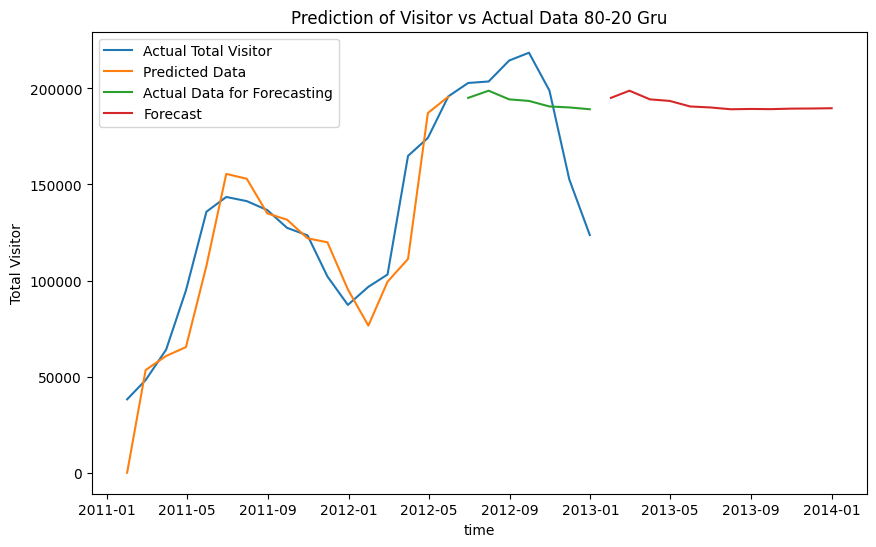

In [44]:
monthly_data_index = monthly_data.index.to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data_index, monthly_data['cnt'], label='Actual Total Visitor')

start_index_train = train_data.index[0]
end_index_train = start_index_train + pred_testing.shape[0]
plt.plot(monthly_data_index[start_index_train:end_index_train], pred_testing, label='Predicted Data')

# Plot nilai prediksi untuk data uji
start_index_test = end_index_train
end_index_test = start_index_test + pred.shape[0]
plt.plot(monthly_data_index[start_index_test:end_index_test], pred, label='Actual Data for Forecasting')

plt.plot(predicted_forecast['cnt'], label='Forecast')
plt.title('Prediction of Visitor vs Actual Data 80-20 Gru')
plt.xlabel('time')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()

## Conclusion

- Pertanyaan 1: Apakah holiday mempengaruhi jumlah peminjaman sepeda, memiliki kesimpulan yaitu bahwa holiday tidak terlalu mempengaruhi jumlah dari peminjaman sepeda, memang benar hari dengan status "not holiday" memiliki jumlah peminjaman yang lebih besar secara rata-rata, namun selisih di antara keduanya terlalu kecil terutama jika dilihat menggunakan pie chart dan persentase dimana selisih keduanya hanya sekitar 9% ditambah data yang kurang untuk perhitungan dikarenakan jumlah hari dengan status holiday hanya sebanyak 21 yang jauh jika dibandingkan hari dengann status "not holiday" yang memiliki jumlah hingga 700. Selain berdasarkan visualisasi, hal ini juga digambarkan dengan korelasi yang dimiliki oleh variabel holiday dengan cnt yang sangat kecil hanya -0.07 dimana menunjukkan bahwa keduanya tidak terlalu berpengaruh

- Pertanyaan 2: Hari apakah yang memiliki jumlah peminjaman terbesar dan terkecil, memiliki jawaban bahwa hari sabtu atau saturday memiliki jumlah peminjaman sepeda terbesar dan hari dengan jumlah peminjaman terkecil adalah hari senin atau monday

- Pertanyaan 3: Pada pukul berapa puncak peminjaman sepeda terjadi, memiliki jawaban bahwa peminjaman sepeda terbesar berada pada pukul 17 dengan selisih kecil dengan 16 serta 18 yang menandakan waktu sore merupakan waktu dengan penyewaan sepeda terbesar pada rentang waktu 16-18 dimana puncaknya berapa pada pukul 17.

- Pertanyaan 4: Bagaimana pertumbuhan peminjaman sepeda pada tahun 2011 dengan 2012, didapatkan jawaban bahwa pertumbuhan pada rentang satu tahun tersebut sangatlah baik karena jika dilihat dari grafik bar chart yang telah dibuat kenaikan jumlah sewa hampir dua kali lipat dari tahun 2011 dan jika dilihat dari line chart per bulannya dapat dilihat bahwa hampir setiap bulan jumlah sewa sepeda meningkat jika dibandingkan periode yang sama pada tahun sebelumnya maupun pada bulan sebelumnya walaupun pada beberapa bulan terakhir mengalami penurunan tetapi jumlah penyewaan tetap lebih besar dibandingkan tahun sebelumnya